In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
print("The shape of data set is :" ,match.shape)
match.head()

The shape of data set is : (756, 18)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
print("The shape of data set is :" ,delivery.shape)
delivery.head().Ttotal_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

The shape of data set is : (179078, 21)


<ipython-input-4-1e4643660964>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  delivery.head().Ttotal_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [5]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [6]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df.sample(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
34,35,IPL-2017,Chandigarh,30-04-2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN,35,67
527,528,IPL-2015,Pune,15-04-2015,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,bat,normal,0,Delhi Daredevils,0,5,MA Agarwal,Maharashtra Cricket Association Stadium,CB Gaffaney,K Srinath,NaN,528,165
109,110,IPL-2008,Chennai,24-05-2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri,NaN,110,211


In [7]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [8]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [9]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [10]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [11]:
# Removing those matches who are cancelled due to rain
match_df = match_df[match_df['dl_applied'] == 0]
match_df = match_df[['match_id','city','winner','total_runs']]
match_df.tail()

,match_id,city,winner,total_runs
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155
755,11415,Hyderabad,Mumbai Indians,152


In [12]:
delivery_df = match_df.merge(delivery,on='match_id')
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df.sample(4)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
116642,594,Hyderabad,Sunrisers Hyderabad,143,2,Sunrisers Hyderabad,Kings XI Punjab,16,5,EJG Morgan,...,0,0,0,0,6,0,6,NaN,NaN,NaN
62550,330,Chandigarh,Kolkata Knight Riders,124,2,Kolkata Knight Riders,Kings XI Punjab,11,6,JH Kallis,...,0,0,0,0,1,0,1,NaN,NaN,NaN
73914,390,Mumbai,Mumbai Indians,209,2,Delhi Daredevils,Mumbai Indians,5,4,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
120717,631,Kolkata,Kolkata Knight Riders,171,2,Sunrisers Hyderabad,Kolkata Knight Riders,14,6,Yuvraj Singh,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [13]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df.sample(4)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
13356,86,Mumbai,Mumbai Indians,103,2,Mumbai Indians,Rajasthan Royals,8,5,YV Takawale,...,0,4,0,4,NaN,NaN,NaN,46,57,73
24739,138,East London,Mumbai Indians,148,2,Kolkata Knight Riders,Mumbai Indians,8,4,BJ Hodge,...,0,2,0,2,NaN,NaN,NaN,43,105,74
117364,602,Delhi,Delhi Daredevils,186,2,Kolkata Knight Riders,Delhi Daredevils,17,4,AD Russell,...,0,0,0,0,NaN,NaN,NaN,147,39,20
98633,508,Mumbai,Mumbai Indians,173,2,Delhi Daredevils,Mumbai Indians,19,6,KM Jadhav,...,0,0,0,0,NaN,NaN,NaN,147,26,6


In [14]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [15]:
# Creating Current Run Rate Column (runs/overs)
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
# Creating Required Run Rate Column 
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [16]:
# Function for defining winning team
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [17]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [18]:
df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [19]:
# Shuffling Data
df = df.sample(df.shape[0])
print("The shape of data set is :" ,df.shape)
df.sample(3)

The shape of data set is : (72413, 10)


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
112702,Kolkata Knight Riders,Rajasthan Royals,Mumbai,81,46,7,199,9.567568,10.565217,0
33710,Rajasthan Royals,Mumbai Indians,Mumbai,211,116,9,212,1.500000,10.913793,0
136388,Chennai Super Kings,Delhi Capitals,Delhi,58,63,9,154,10.105263,5.523810,1


In [20]:
df.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,72413.000000,72413.000000,72413.000000,72413.000000,72413.000000,7.240600e+04,72413.000000
mean,92.258379,62.657078,7.535967,165.583956,7.439523,NaN,0.525624
std,50.021962,33.404593,2.138637,29.282200,2.275850,NaN,0.499346
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-inf,0.000000
25%,53.000000,35.000000,6.000000,146.000000,6.257143,7.142857e+00,0.000000
50%,92.000000,63.000000,8.000000,165.000000,7.480519,8.877551e+00,1.000000
75%,130.000000,92.000000,9.000000,185.000000,8.682353,1.090909e+01,1.000000
max,249.000000,119.000000,10.000000,250.000000,42.000000,inf,1.000000


In [21]:
df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [22]:
df.dropna(axis=0,inplace=True)

In [23]:
df = df[df['balls_left'] != 0]

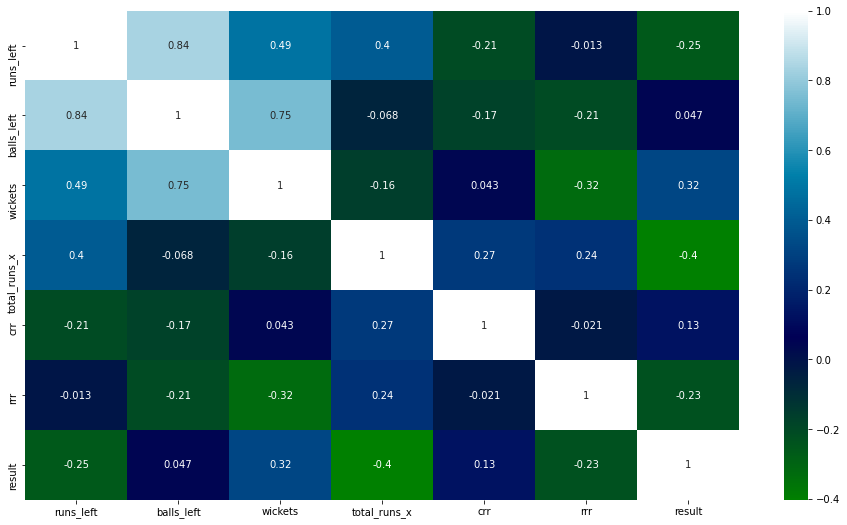

In [24]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,cmap='ocean')
plt.show()

In [25]:
x=df.drop(columns=['result'])
y=df['result']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23)
print("shape of xtrain is : ",xtrain.shape)
print("shape of xtest is : ",xtest.shape)
print("shape of ytrain is : ",ytrain.shape)
print("shape of ytest is : ",ytest.shape)

shape of xtrain is :  (57073, 9)
shape of xtest is :  (14269, 9)
shape of ytrain is :  (57073,)
shape of ytest is :  (14269,)


In [26]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [27]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [28]:
from sklearn import set_config
set_config(display='diagram')
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [29]:
y_pred = pipe.predict(xtest)
accuracy_score(ytest,y_pred)

0.8076950031536898

In [30]:
pipe.predict_proba(xtest)[11]

array([0.15271264, 0.84728736])

In [31]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))